<a href="https://colab.research.google.com/github/nyoons/ESAA/blob/main/Part_03_%EC%BC%80%EB%9D%BC%EC%8A%A4_%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 03. 케라스**

##**01. 딥러닝 준비**
케라스 : 딥러닝 라이브러리. 텐서플로, CNTK, Theano, MXNet 등의 벡엔드 엔진을 지정하여 사용한다. 딥러닝 라이브러리를 쉽고 간결한 코드로 실행하는 것이 목적. 이제 다른 딥러닝 라이브러리를 벡엔드로 지정하지 않고 오직 텐서플로만 지원. 

###**1-1. 주요 용어**

####1-1-1. 하이퍼파라미터
딥러닝뿐만 아니라 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값. 하이퍼파라미터 튜닝.

####1-1-2. 과소적합 vs. 과대적합
모델이 충분히 학습되지 않은 경우 예측 성능이 떨어짐 -> 과소적합. 반대로 지나치게 반복 학습되어 과하게 적합됨 -> 과대적합. 불필요한 노이즈는 데이터 분석 및 전처리로 해소해야한다.

####1-1-3. 에포크
딥러닝 모델이 반복 훈련 시 데이터셋을 전부 학습에 사용하는 1회 훈련 루프를 1 epoch라고 한다.

####1-1-4. 손실함수
= 예측 값과 정답 값의 차이 또는 오차. 사용자가 정의한다.
* 분류 : binary_crossentropy, categorical_crossentropy 등
* 회귀 : mean_squared_error, maen_absolute_error 등

In [2]:
import tensorflow as tf

#클래스
#tf.keras.losses.BinaryCrossentropy()

#함수
#tf.keras.losses.binary_crossentropy()

####1-1-5. 경사하강법
모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하며 결국 최소 함수 값을 찾도록 하는 방법. 딥러닝 훈련 과정에서 경사하강법 알고리즘을 적용해 손실함수 값을 최소 만드는 가중치를 찾을 수 있다.

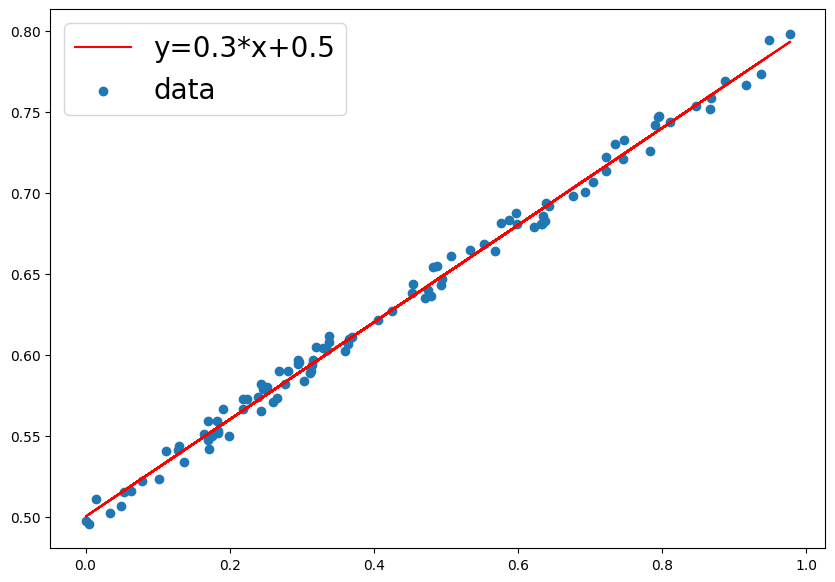

w:0.3, b:0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용한 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x=np.random.rand(size)
  y=w*x+b
  noise=np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y= make_linear(w=0.3, b=0.5, size=100, noise=0.01)

실제 데이터는 약간의 노이즈가 추가되어 있음.

이제 경사하강법 알고리즘의 핵심인 w, b 에 대한 그래디언트를 구하는 부분만 구현하면 된다. 손실함수를 w, b에 대해 각각 편미분하여 학습률 계수를 곱하고 이전 w, b에서 차감.

In [4]:
#최대 반복 횟수
num_epoch=1000

#학습률
learning_rate=0.005

#에러 기록
errors=[]

#random 한 값으로 w, b 초기화
w=np.random.uniform(low=0.0, high=1.0)
b=np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  #가설 정의
  y_hat=w*x+b

  #손실 함수 정의
  error=0.5*((y_hat-y)**2).sum()
  if error<0.005:
    break
  #그라디언트 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()

  errors.append(error)

  if epoch%5==0:
    print('{0:2}w={1:.5f}, b={2:.5f} error ={3:.5f}'.format(epoch, w, b, error))

print('----'*15)
print('{0:2}w={1:.1f}, b={2:.1f} error ={3:.5f}'.format(epoch, w, b, error))


 0w=0.21187, b=0.42088 error =4.31330
 5w=0.26176, b=0.51626 error =0.00750
10w=0.26723, b=0.51506 error =0.00575
------------------------------------------------------------
14w=0.3, b=0.5 error =0.00497


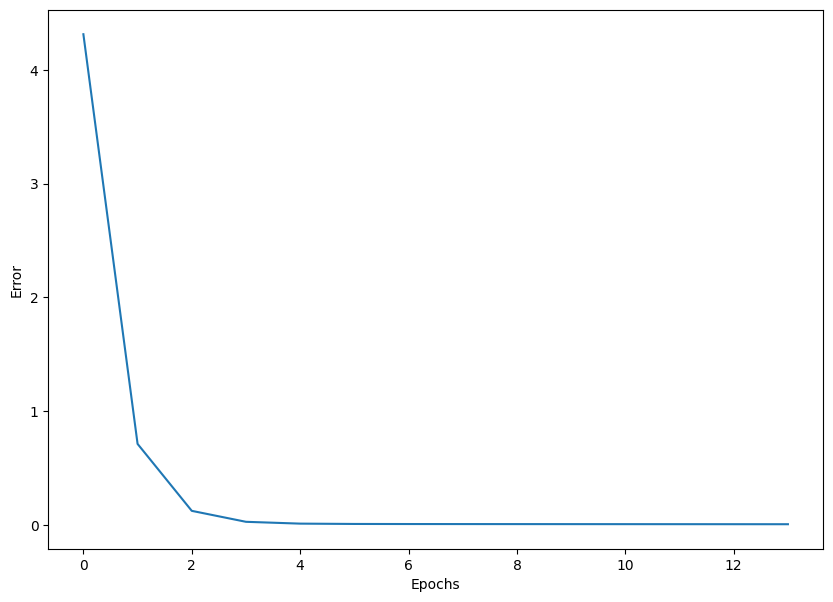

In [5]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

매 실행마다 수렴 속도는 차이가 있으나 결국 목표하는 오차 범위 안으로 수렴하여 반복문을 종료하게 된다. 결국 w, b는 설정한 값과 비슷한 값임.

###**1-2. 딥러닝 프로세스**
데이터 로드 > 데이터 전처리 (특성 공학, 특성 선택, 특성 추출) > 데이터 분할 > **모델 생성 & 컴파일 > 훈련 > 검증** > 예측

####1-2-1. 데이터 전처리
데이터 가공. 차원을 변경하거나 스케일 조정을 하기도 함.

####1-2-2. 모델 생성
모델의 구조를 정의하고 생성하는 단계. Sequential API, Functional API, Model Subclassing.

####1-2-3.모델 컴파일
딥러닝 모델의 구조를 정의하고 생성하면, 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의.

####1-2-4. 모델 훈련
fit(). 훈련/검증 데이터셋, epoch, 배치 크기 및 콜백 함수 등을 지정.

####1-2-5. 모델 검증
검증 데이터셋 이용.

####1-2-6. 모델 예측

##**02. 단순 신경망 훈련**

###**2-1. 선형 회귀**
텐서플로 케라스를 활용해 단순선형회귀 모델을 만들고 딥러닝을 학습하자. y=wx+b.

###**2-2. 뉴런**
인공 신경망 모델을 구성하는 하나의 신경을 의미. = 노드. 뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진해앟며 오차 역전파를 통해 뉴런의 가중치가 업데이트 된다.

###**2-3. Dense 레이어**
심층 신경망 모델을 구성하는 가장 기본 레이어. 각 레이어와 레이어 사이 모든 뉴런이 서로 연결되어 있기 때문에 완전 연결층 이라고도 부름.

Dense 레이어를 구성하는 노드 개수와 활성화 함수를 지정할 수 있다.

In [6]:
import tensorflow as tf

#10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

#ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

###**2-4. 데이터셋 만들기**

In [8]:
#샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


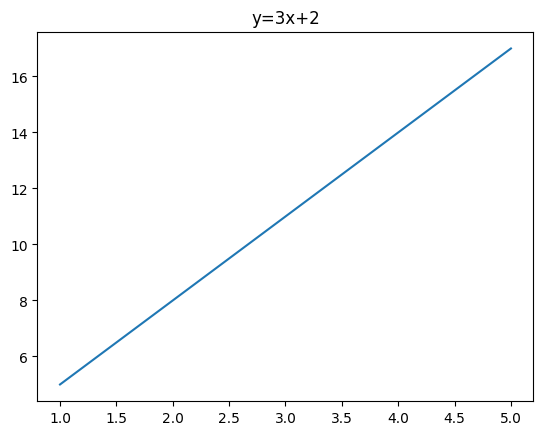

In [9]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x, y)
plt.title('y=3x+2')
plt.show()

###**2-5. Sequential API**
텐서플로 케라스는 세가지 방법으로 모델을 구성할 수 있다. sequential은 매우 간결. 입력 레이어부터 출력 레이어까지 순서를 갖고 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식. 2개 이상의 다중 입력이나 다중 출력을 갖는 복잡한 구조는 만들 수 없다.

####2-5-1. 모델 구조
Sequential API를 사용하여 모델 생성 시 다음과 같은 두 가지 방법으로 모델을 구성할 수 있다.

리스트형 정의로 Sequential 클래스 함수에 파이썬 리스트 형태로 여러 개의 층 입력.

In [10]:
#dense 레이어 3개를 갖는 모델
import tensorflow as tf

#리스트형
model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

add 함수로 레이어 추가로 Sequential 클래스 객체를 먼저 만든 뒤, 생성된 모델 인스턴스에 층을 추가하는 방식도 있다.

In [11]:
#add 함수로 레이어 추가
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

####2-5-2. 입력 데이터 형태
Sequential API 사용시 반드시 첫번째 층은 input_shape 매개변수를 지정해야한다.

In [12]:
import tensorflow as tf
model=tf.keras.Sequential([
    #입력 데이터의 shape=(150, 4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

####2-5-3. 단순선형회귀 모델 정의
단순선형회귀 모델은 1개의 뉴런(w, b)을 가지는 dense 레이어 한개를 사용.

In [13]:
#단순선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]) #input_shape=[1]은 입력 데이터는 x 값을 나타내는 입력 변수가 1개
])

###**2-6. 모델 요약**
Sequential API 를 만들었다면 모델의 요약도 확인할 수 있다.

모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표시된다.

In [14]:
#모델 요약
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


###**2-7. 컴파일**
컴파일 단계에서는 모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의한다.**굵은 텍스트**

In [15]:
#긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mean_squared_error', 'mean_absolute_error'])

In [16]:
#짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [17]:
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

In [18]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###**2-8. 훈련**
훈련한다=가중치 텐서를 업데이트하는 과정.

In [19]:
#훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 732ms/step - loss: 157.7055 - mae: 11.6966
Epoch 2/5
1/1 [==============================] - 0s 25ms/step - loss: 91.9816 - mae: 8.9694
Epoch 3/5
1/1 [==============================] - 0s 18ms/step - loss: 53.6805 - mae: 6.8874
Epoch 4/5
1/1 [==============================] - 0s 24ms/step - loss: 31.3599 - mae: 5.2979
Epoch 5/5
1/1 [==============================] - 0s 25ms/step - loss: 18.3521 - mae: 4.0844


손실함수, 즉 모델의 예측 오차가 점점 줄어들고 있다. 하지만 반복 훈련 횟수가 충분하지 않음. 현재 과소 적합 상태.

In [20]:
#단순 선형회귀 모델 생성
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history=model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 558ms/step - loss: 127.0573 - mae: 10.5303
Epoch 2/1200
1/1 [==============================] - 0s 44ms/step - loss: 74.1374 - mae: 8.0830
Epoch 3/1200
1/1 [==============================] - 0s 19ms/step - loss: 43.2977 - mae: 6.2147
Epoch 4/1200
1/1 [==============================] - 0s 17ms/step - loss: 25.3252 - mae: 4.7883
Epoch 5/1200
1/1 [==============================] - 0s 15ms/step - loss: 14.8511 - mae: 3.6992
Epoch 6/1200
1/1 [==============================] - 0s 15ms/step - loss: 8.7467 - mae: 2.8677
Epoch 7/1200
1/1 [==============================] - 0s 19ms/step - loss: 5.1887 - mae: 2.2328
Epoch 8/1200
1/1 [==============================] - 0s 20ms/step - loss: 3.1147 - mae: 1.7480
Epoch 9/1200
1/1 [==============================] - 0s 19ms/step - loss: 1.9054 - mae: 1.3777
Epoch 10/1200
1/1 [==============================] - 0s 35ms/step - loss: 1.2001 - mae: 1.0949
Epoch 11/1200
1/1 [==============================] 

mse, mae 모두 개선됨.

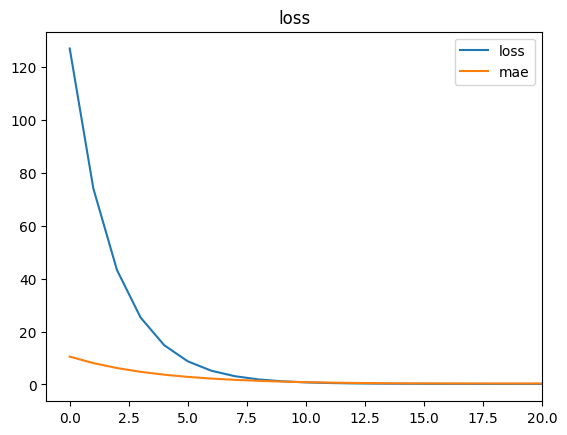

In [21]:
import matplotlib.pyplot as plt

#20 epoch까지 loss 수렴에 대한 시각화
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('loss')
plt.legend()
plt.show()

초반에는 손실이 급격히 감소하지만 점차 감소 폭이 둔화됨.

###**2-9. 검증**

In [22]:
#검증
model.evaluate(x, y)

1/1 [==============================] - 1s 765ms/step - loss: 6.8114e-05 - mae: 0.0071


[6.811404455220327e-05, 0.007083797361701727]

###**2-10. 예측**
새로운 입력 데이터를 넣어 예측 값을 얻어보자.

In [23]:
#예측
model.predict([10])

1/1 [==============================] - 0s 133ms/step


array([[32.034237]], dtype=float32)

꽤 근사한 값을 예측함.

##**03. 심층 신경망으로 이미지 분류**
이미지 분류를 위해 단층이 아닌 더 깊은 층을 쌓아 깊이가 있는 딥러닝 모델을 생성한다.

###**3-1. 케라스 내장 데이터셋 로드**
케라스의 샘플 데이터셋
- boston_housing
- cifar10
- cifar100
- mnist
- fashion_mnist
- imdb
- reuters : Reuters 뉴스 토픽

In [24]:
import tensorflow as tf

#케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist=tf.keras.datasets.mnist

In [25]:
#load_data()로 데이터 로드
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [26]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


28*28 픽셀 크기의 정사각형 이미지가 60000장 있다는 것.

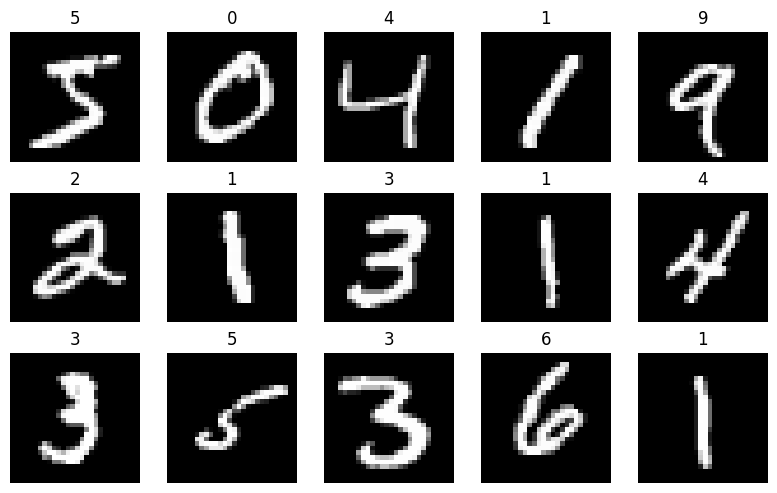

In [27]:
#데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5, i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

###**3-2. 데이터 전처리**
이미지 데이터에 대해 정규화를 통해 데이터의 범위를 조절하자.

In [28]:
#x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

0~255 사이의 값으로 이루어짐. 데이터의 범위를 0 ~ 1로 정규화하기 위해 255로 나누자.

In [30]:
#픽셀 값의 최소/최대 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#데이터 정규화
x_train=x_train/x_train.max()

#정규화 후 최소/최대 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [31]:
#test에도 정규화 동일 적용
x_test=x_test/x_test.max()

In [32]:
#변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

정규화를 하면 비정규화된 입력 데이터를 가질 때보다 더 빨리 수렴하며 국소 최적에 빠지는 현상도 방지해준다.

###**3-3. Flatten 레이어**
샘플 이미지 형태는 (28*28)이며 2차원 입력이다. 2차원 입력은 dense에 넣을 수 없다. 전처리 필요.

In [33]:
print(f'변경 전 shape: {x_train.shape}')
print(f'1D로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D로 shape 변경 후: (60000, 784)


또는 다음과 같이 flatten 레이어를 사용해 데이터를 1차원으로 펼칠 수 있다.

In [34]:
print(f'변경 전 shape: {x_train.shape}')

#flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


###**3-4. 활성화 함수**
입력을 비선형 출력으로 변환해주는 함수. 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현되기도 한다. 시그모이드, 하이퍼볼릭 탄젠트, ReLU 등.

In [35]:
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

다음과 같이 별도의 층처럼 적용할 수도 있다. Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용함.

In [36]:
#Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model=tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

###**3-5. 입력과 출력**
분류 모델의 가장 마지막 레이어는 출력층. 출력층의 노드 개수는 반드시 분류해야할 클래스의 개수와 동일해야한다. mnist의 경우는 10개.

In [37]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    #노드=10개(클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

출력층의 노드가 2개 이상인 경우는 softmax 활성화 함수를 적용한다. (다중 분류 문제). 이진 분류 모델의 경우는 시그모이드 적용. 단, 이진 분류여도 출력 레이어의 클래스를 원핫 인코딩으로 변환해 노드 개수가 2개면 softmax 적용.

In [38]:
#출력층 노드 =1 인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')
#출력층 노드 =2 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax')

###**3-6. 손실함수**
분류 모델의 손실함수는 모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련한다.

이진 분류기 생성 시 노드 개수 1이면 활성화 함수는 시그모이드, 손실함수는 binary_crossentropy 지정

In [39]:
#이진 분류 (출력 노드 개수 =1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

다중 분류 모형은 활성화 함수는 소프트맥스, 손실함수는 categorical_crossentropy 혹은 sparse_categorical_crossentropy 지정

In [40]:
#y가 원핫 벡터인 경우
#[0.. 0.. 0.. 1.. 0..]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터가 아닌 경우 -> mnist의 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')

###**3-7. 옵티마이저**
손실을 낮추기 위해, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법. 일반적으로 Adam 알고리즘을 사용.
- SGD
- Adam
- Adagrad
- Nadam
- RMSprop
- Adadelta
- Adamax
- Ftrl

옵티마이저는 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.

In [41]:
#클래스 인스턴스로 지정
adam=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer=['adam'])

###**3-8. 평가지표**
분류 모델에서는 accuracy가 가장 흔히 사용.

옵티마이저와 마찬가지로 클래스 인스턴스로 지정하거나 문자열로 지정할 수 있다.

In [42]:
#클래스 인스턴스로 지정
acc=tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [43]:
#문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###**3-9. 훈련**
선형회귀 모델을 학습시킬 때 별도의 검증 데이터셋을 만들지 않았음. 그러나 검증 셋 존재.

In [45]:
#훈련
model.fit(x_train, y_train,
          #검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 19s 9ms/step - loss: 0.2297 - accuracy: 0.9311 - val_loss: 0.1165 - val_accuracy: 0.9630
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0973 - accuracy: 0.9699 - val_loss: 0.1183 - val_accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0683 - accuracy: 0.9790 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0856 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0413 - accuracy: 0.9865 - val_loss: 0.0652 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0749 - val_accuracy: 0.9774
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0701 - v

###**3-10. 평가**
10회의 epoch가 끝나고 훈련이 종료되면 evaluate()으로 모델 성능을 검증하고 평가 결과를 확인할 수 있다.

In [46]:
#검증
test_loss, test_acc=model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0749 - accuracy: 0.9820
검증 셋 정확도: 0.9819999933242798


매우 높다.

###**3-11. 예측**
predict() 메소드에 이미지 데이터를 넣어주면 모델의 예측 결과를 반환한다.

In [47]:
#예측
predictions=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


결과가 넘파이 배열 형태로 저장된다.

In [48]:
#예측 결과 출력
predictions[0]

array([1.7106414e-10, 2.1222595e-09, 2.6817719e-07, 2.0935565e-06,
       4.4313799e-11, 3.0076295e-09, 1.2435136e-13, 9.9999672e-01,
       4.5235720e-07, 4.0685387e-07], dtype=float32)

모델의 마지막 노드가 10개라 10개의 값이 출력됨. 이 중 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스.

In [49]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


시각화 해보자.

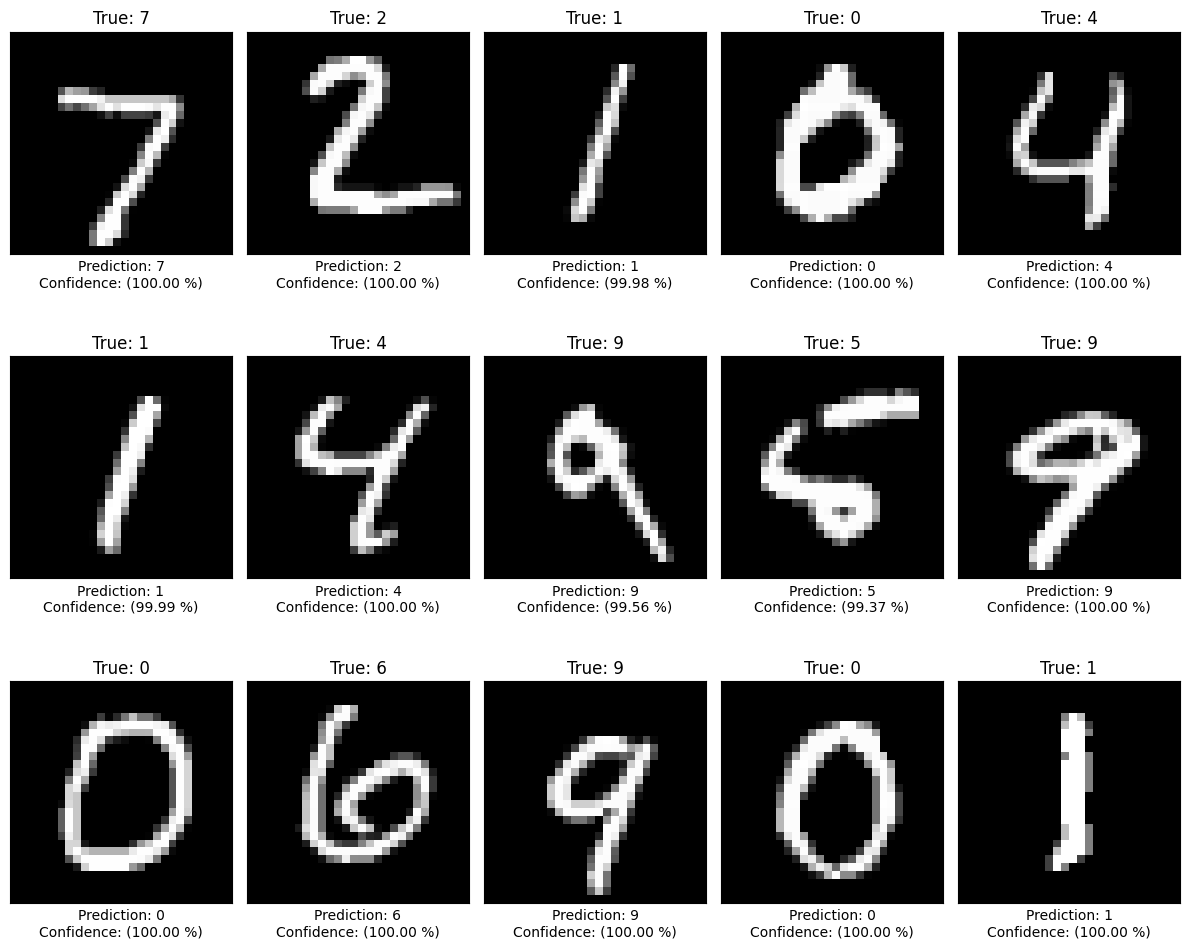

In [50]:
#데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence=x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig, axes=plt.subplots(3,5)
fig.set_size_inches(12, 10)
for i in range(15):
  ax=axes[i//5, i%5]
  img, y_true, y_pred, confidence=get_one_result(i)
  #imshow로 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()